# Importing necessary packages and data

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


# Preprocessing

In [15]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train, y_test = y_train.flatten(), y_test.flatten()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)


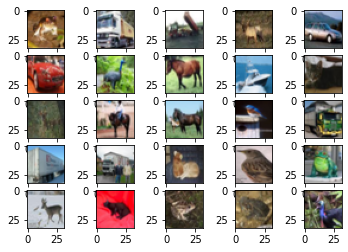

In [18]:
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k])
        k += 1

plt.show()

# Ann - ablation 1


In [30]:
ann = tf.keras.models.Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

a = ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 62s 39ms/step - loss: 1.8094 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.6224 - accuracy: 0.4266
Epoch 3/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.5394 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4822 - accuracy: 0.4786
Epoch 5/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.4320 - accuracy: 0.4960


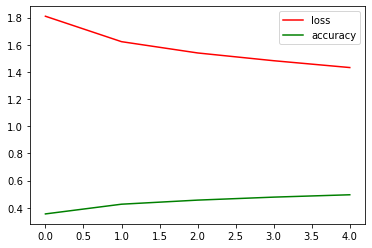

In [31]:
plt.plot(a.history['loss'], label='loss', color='red')
plt.plot(a.history['accuracy'], label='accuracy', color='green')
plt.legend()


# Basic cnn - ablation 2

In [35]:
cnn=tf.keras.models.Sequential([
    Conv2D(filters=32, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(100,activation="relu"),
    Dense(10,activation="softmax")
      
])

In [37]:
cnn.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
c = cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.4251 - accuracy: 0.4883
Epoch 2/5
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0705 - accuracy: 0.6253
Epoch 3/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.9380 - accuracy: 0.6748
Epoch 4/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8450 - accuracy: 0.7055
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.7663 - accuracy: 0.7339


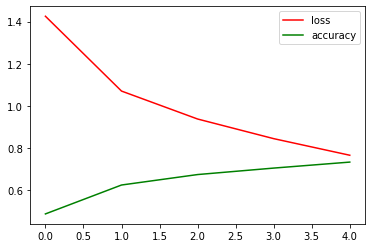

In [38]:
plt.plot(c.history['loss'], label='loss', color='red')
plt.plot(c.history['accuracy'], label='accuracy', color='green')
plt.legend()

# Cnn with more maxpool layers - ablation 3

In [51]:
cnn2=tf.keras.models.Sequential([
    Conv2D(filters=64, kernel_size=(3, 3),activation="relu",input_shape=(32,32,3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3, 3),activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3),activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64,activation="relu"),
    Dense(256,activation="relu"),
    Dense(64,activation="relu"),
    Dense(128,activation="relu"),
    Dense(64,activation="relu"),
    Dense(10,activation="softmax")
      
])

cnn2.compile(
   optimizer="adam",
   loss="sparse_categorical_crossentropy",
   metrics=["accuracy"]

)
c2 = cnn.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4563 - accuracy: 0.8398
Epoch 2/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4055 - accuracy: 0.8565
Epoch 3/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.3665 - accuracy: 0.8711
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.3311 - accuracy: 0.8827
Epoch 5/5
1563/1563 [==============================] - 32s 20ms/step - loss: 0.2961 - accuracy: 0.8946


In [ ]:
plt.plot(c2.history['loss'], label='loss', color='red')
plt.plot(c2.history['accuracy'], label='accuracy', color='green')
plt.legend()

# CNN with more layers and batch normalization -ablation 4

In [19]:
K = len(set(y_train))
 
# calculate total number of classes
# for output layer
print("number of classes:", K)
 
# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
 
x = Flatten()(x)
x = Dropout(0.2)(x)
 
# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
 
# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)
 
model = Model(i, x)
 
# model description
model.summary()

number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16

In [20]:
# Compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [22]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=5)


Epoch 1/5
1563/1563 [==============================] - 148s 95ms/step - loss: 1.1285 - accuracy: 0.5990 - val_loss: 0.8893 - val_accuracy: 0.6890
Epoch 2/5
1563/1563 [==============================] - 152s 97ms/step - loss: 0.8103 - accuracy: 0.7191 - val_loss: 0.8405 - val_accuracy: 0.7092
Epoch 3/5
1563/1563 [==============================] - 147s 94ms/step - loss: 0.6722 - accuracy: 0.7681 - val_loss: 0.8193 - val_accuracy: 0.7321
Epoch 4/5
1563/1563 [==============================] - 147s 94ms/step - loss: 0.5716 - accuracy: 0.8049 - val_loss: 0.6450 - val_accuracy: 0.7859
Epoch 5/5
1563/1563 [==============================] - 145s 93ms/step - loss: 0.4826 - accuracy: 0.8350 - val_loss: 0.6730 - val_accuracy: 0.7959


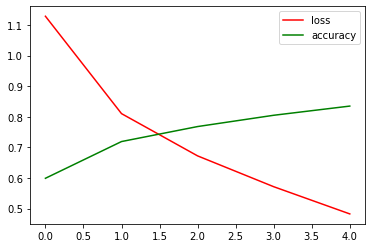

In [26]:
# Plot accuracy per iteration
plt.plot(r.history['loss'], label='loss', color='red')
plt.plot(r.history['accuracy'], label='accuracy', color='green')
plt.legend()
